In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from classification_library import AirQualityLoader
from timeseries_library import ARIMAForecaster

%matplotlib inline
print("Setup ARIMA Ready!")

Setup ARIMA Ready!


In [2]:
# ARIMA chạy rất nặng, nên ta chỉ lấy 1 trạm và cắt lấy 1000 dòng cuối để demo nhanh
ZIP_PATH = os.path.join('..', 'data', 'raw', 'PRSA2017_Data_20130301-20170228.zip')
loader = AirQualityLoader(ZIP_PATH)
df_all = loader.preprocess()

# Chọn trạm Aotizhongxin
df_station = df_all[df_all['station'] == 'Aotizhongxin'].copy()

# Lấy 2 tháng cuối cùng (để chạy cho nhanh và thấy rõ xu hướng)
df_small = df_station.tail(24 * 60) # 60 ngày cuoi

# Khởi tạo
arima_tool = ARIMAForecaster(df_small)

Dang doc du lieu tu: ..\data\raw\PRSA2017_Data_20130301-20170228.zip
Tim thay 12 file CSV trong file zip.
Da gop xong. Kich thuoc du lieu thô: (420768, 18)
Dang xu ly thoi gian...
Xu ly xong. Kich thuoc du lieu sach: (420768, 14)


c:\Users\Admin\Downloads\Lab4_TimeSeries\src\timeseries_library.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.data = self.data.asfreq('H')


In [3]:
# Nếu p-value < 0.05 -> d=0. Nếu không thì thử d=1
is_stationary = arima_tool.check_stationarity(col='PM2.5')

--- Kiem tra tinh dung (ADF Test) cho: PM2.5 ---
ADF Statistic: -5.047737592084842
p-value: 1.783926306077701e-05
=> Ket luan: Chuoi la chuoii DUNG (Stationary). Co the chon d=0.


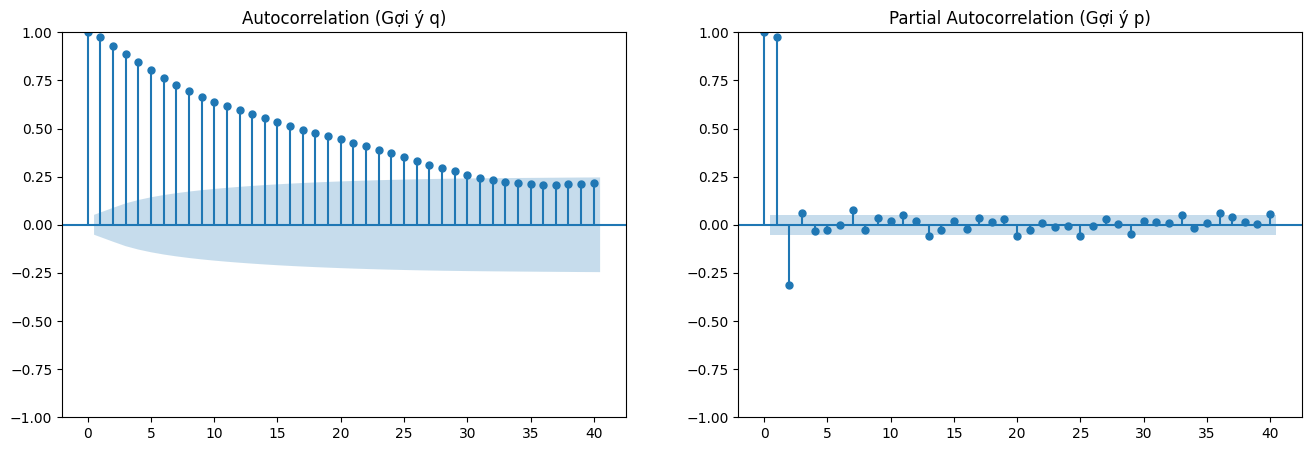

In [ ]:
# Nhìn biểu đồ để đoán p, q
arima_tool.plot_acf_pacf(col='PM2.5', lags=40)

# - PACF (bên phải) cắt bụp sau lag k -> chọn p = k
# - ACF (bên trái) giảm từ từ -> dấu hiệu của AR

Dang train ARIMA voi order=(1, 0, 1)...
Da train xong!
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                 1368
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6354.948
Date:                Thu, 08 Jan 2026   AIC                          12717.895
Time:                        09:50:14   BIC                          12738.780
Sample:                    12-31-2016   HQIC                         12725.711
                         - 02-25-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.9161     29.374      3.436      0.001      43.343     158.489
ar.L1          0.9602      0.006    162.976      0.000       0.949       0.9

c:\Users\Admin\miniconda3\envs\bejing_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


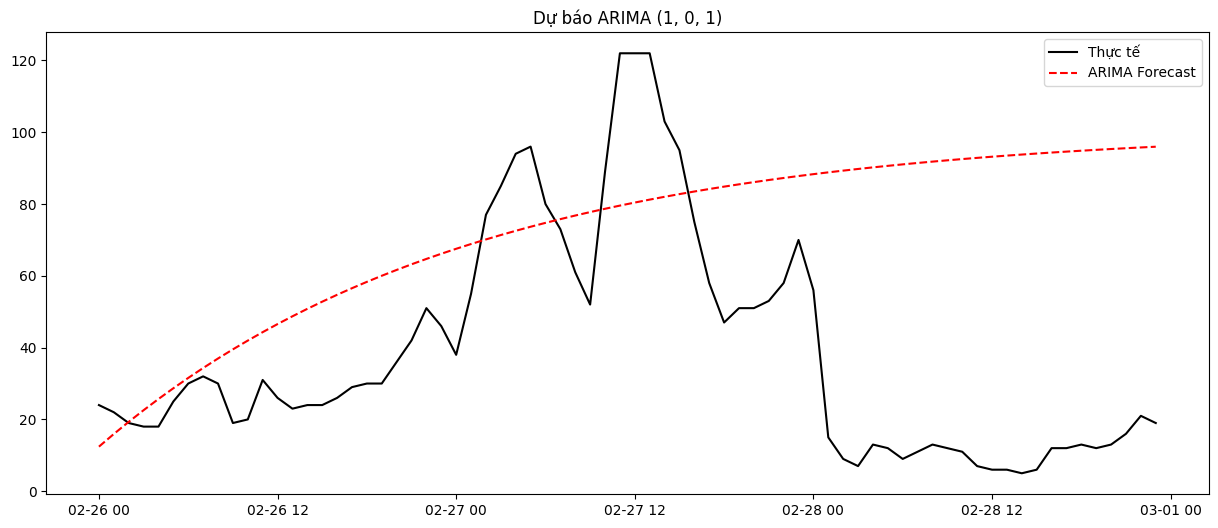

In [10]:
# Dựa vào biểu đồ trên, ta thử bộ tham số (p,d,q).
# Ví dụ thường gặp cho PM2.5: (1, 0, 1) hoặc (2, 0, 1)
# thử thay đổi số ở đây xem kết quả nào tốt hơn
order = (1, 0, 1) 

arima_tool.train_arima(order=order)
actual, preds = arima_tool.forecast_and_evaluate()

# Vẽ kết quả
plt.figure(figsize=(15, 6))
plt.plot(actual.index, actual, label='Thực tế', color='black')
plt.plot(actual.index, preds, label='ARIMA Forecast', color='red', linestyle='--')
plt.title(f"Dự báo ARIMA {order}")
plt.legend()
plt.show()